In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# TODO: implement part (a)

In [ ]:
# TODO: implement part (b)

In [ ]:
# TODO: implement part (d)

In [2]:
# load computational fluid dynamics (CFD) velocity data from disk
# (array only contains the y-component of the velocity vector)
vcfd = np.load("cfd_velocity.npy")
# dimensions are (x, y, time)
vcfd.shape

(21, 101, 50)

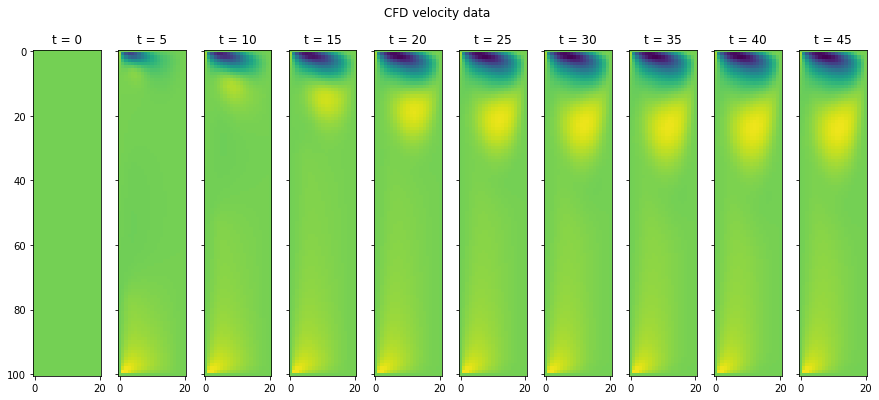

In [3]:
# visualize data
fig, ax = plt.subplots(1, 10, sharey=True, figsize=(15, 6))
plt.suptitle("CFD velocity data")
# use same color range in all subplots
vmin_dat = np.min(vcfd)
vmax_dat = np.max(vcfd)
for j in range(10):
    ax[j].imshow(vcfd[:, :, 5*j].T, vmin=vmin_dat, vmax=vmax_dat)
    ax[j].set_title("t = {}".format(5*j))
plt.show()

In [ ]:
# perform HOSVD
max_ranks = [5, 10, 8]
# TODO: uncomment to call your implementation of the HOSVD here
# Ulist, C, σlist = higher_order_svd(vcfd, max_ranks)
# # must agree with `max_ranks`
# print("C.shape:", C.shape)
# np.allclose(C.shape, max_ranks)

In [ ]:
plt.semilogy(range(1, len(σlist[0]) + 1), σlist[0]**2 / np.sum(σlist[0]**2), '.')
plt.axvline(x=max_ranks[0])
plt.ylabel("$\\sigma_j^2$")
plt.xlabel("$j$")
plt.title("normalized singular values along dimension 0");
plt.show()

In [ ]:
plt.semilogy(range(1, len(σlist[1]) + 1), σlist[1]**2 / np.sum(σlist[1]**2), '.')
plt.axvline(x=max_ranks[1])
plt.ylabel("$\\sigma_j^2$")
plt.xlabel("$j$")
plt.title("normalized singular values along dimension 1");
plt.show()

In [ ]:
plt.semilogy(range(1, len(σlist[2]) + 1), σlist[2]**2 / np.sum(σlist[2]**2), '.')
plt.axvline(x=max_ranks[2])
plt.ylabel("$\\sigma_j^2$")
plt.xlabel("$j$")
plt.title("normalized singular values along dimension 2");
plt.show()

In [ ]:
# The Tucker tensor as "full" tensor should only be constructed for debugging and testing.
# Typically one works with the `U` matrices and the core tensor `C` directly.
def construct_tucker_tensor(Ulist, C):
    """
    Construct the full Tucker tensor based on the `U` matrices and the core tensor `C`. 
    """
    assert C.ndim == len(Ulist)
    T = C
    for j in range(T.ndim):
        # apply Uj to j-th dimension
        # TODO: uncomment to call your function from part (b) here
        # T = single_mode_product(Ulist[j], T, j)
    return T

In [ ]:
vcfd_tucker = construct_tucker_tensor(Ulist, C)
# should be equal to original dimensions
vcfd_tucker.shape

In [ ]:
# visualize reconstructed Tucker approximation (should visually match the original data well)
fig, ax = plt.subplots(1, 10, sharey=True, figsize=(15, 6))
plt.suptitle("CFD velocity data (reconstructed from Tucker approximation)")
for j in range(10):
    ax[j].imshow(vcfd_tucker[:, :, 5*j].T, vmin=vmin_dat, vmax=vmax_dat)
    ax[j].set_title("t = {}".format(5*j))
plt.show()